## Bibliotecas

In [22]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [6]:
df = pd.read_csv('data/international-airline-passengers.csv',index_col='Month', parse_dates=True)

In [8]:
df.columns = ['Y_t']

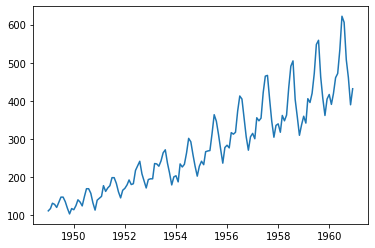

In [9]:
plt.plot(df.index, df.Y_t)
plt.show()

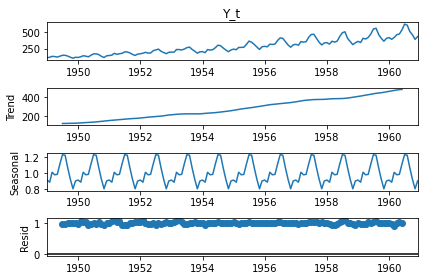

In [10]:
decompose_result = seasonal_decompose(df['Y_t'], model='multiplicative')
decompose_result.plot();

## Holt-Winter Exponencial Smoothing Simples

In [12]:
df.index.freq = 'MS'

# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2 * m)

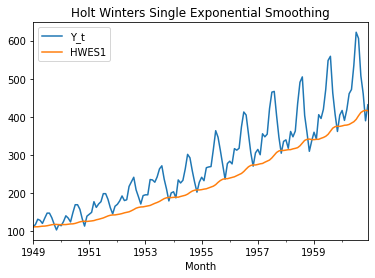

In [13]:
df['HWES1'] = SimpleExpSmoothing(df.Y_t).fit(
    smoothing_level=alpha,
    optimized=False,
    use_brute=True).fittedvalues

df.plot(title='Holt Winters Single Exponential Smoothing');

## Holt-Winter Exponencial Smoothing Duplo

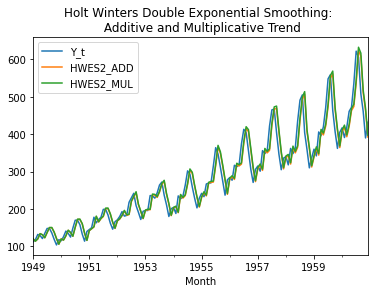

In [14]:
df["HWES2_ADD"] = ExponentialSmoothing(
    df.Y_t,
    trend='add').fit().fittedvalues

df['HWES2_MUL'] = ExponentialSmoothing(
    df.Y_t,
    trend='mul').fit().fittedvalues

df[['Y_t',"HWES2_ADD",'HWES2_MUL']].plot(
    title='Holt Winters Double Exponential Smoothing: \n Additive and Multiplicative Trend');

In [17]:
## Holt-Winter Exponencial Smoothing Triplo

C:\Users\leand\Downloads\toBlue\env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


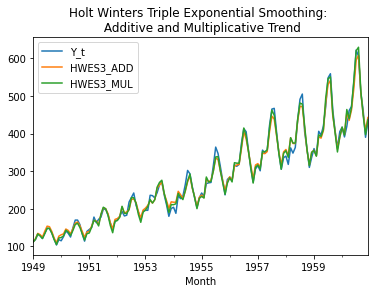

In [16]:
df["HWES3_ADD"] = ExponentialSmoothing(
    df.Y_t,
    trend='add',
    seasonal='add',
    seasonal_periods=12).fit().fittedvalues

df['HWES3_MUL'] = ExponentialSmoothing(
    df.Y_t,
    trend='mul',
    seasonal='mul',
    seasonal_periods=12).fit().fittedvalues

df[['Y_t',"HWES3_ADD",'HWES3_MUL']].plot(
    title='Holt Winters Triple Exponential Smoothing: \n Additive and Multiplicative Trend');

## Com treino e teste

In [19]:
df = pd.read_csv('data/international-airline-passengers.csv',index_col='Month', parse_dates=True)
df.index.freq = 'MS'
df.columns = ['Y_t']
train = df[:120]
test = df[120:]

C:\Users\leand\Downloads\toBlue\env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


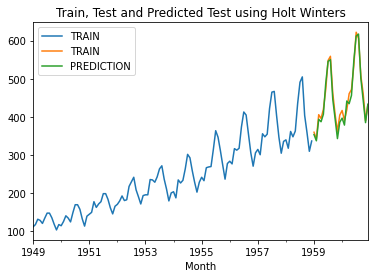

In [20]:
fitted_model = ExponentialSmoothing(
    train.Y_t,
    trend='mul',
    seasonal='mul',
    seasonal_periods=12).fit()

pred = fitted_model.forecast(24)

train.Y_t.plot(legend=True,label="TRAIN")
test.Y_t.plot(legend=True,label="TRAIN",figsize=(6,4))
pred.plot(legend=True,label="PREDICTION")
plt.title("Train, Test and Predicted Test using Holt Winters")
plt.show()

In [23]:
print(f'Mean Absolute Error = {mean_absolute_error(test,pred)}')
print(f'Mean Squared Error = {mean_squared_error(test,pred)}')
print(f'Explained variance score= {explained_variance_score(test,pred)}')

Mean Absolute Error = 12.380724680796638
Mean Squared Error = 192.61506903304277
Explained variance score= 0.9744560582821215


Referências:

- https://medium.com/analytics-vidhya/python-code-on-holt-winters-forecasting-3843808a9873
- https://medium.com/analytics-vidhya/holt-winters-forecasting-13c2e60d983f